# Heart Desease II - Decision Tree vs Random Forest

by Raphael Nussbaumer, Laurin Mühlebach, Lionel Nyffeler

Inhaltsverzeichnis
- **1 Import**
    - 1.1 Basic Libraries
    - 1.2 Importing the Dataset
- **2 Dataset Description**
- **3 Normalize the Dataset**
- **4 Split the Dataset in Multiclass and Binary**
    - 4.1 Multiclass
    - 4.2 Binary
- **5 Define X & Y**
    - 5.1 Multiclass
    - 5.2 Binary
- **6 Analysis of the different classes**
- **7 Split the Dataset into Train-Validation-Test**
    - 7.1 Multiclass
    - 7.2 Binary
- **8 Implementing the Models**
    - 8.1 Decision Tree Binary
      - 8.1.1 Decision Tree Binary Basic
      - 8.1.2 Decision Tree Binary Cross Validation
    - 8.2 Decision Tree with Multiclass
      - 8.2.1 Decision Tree Multiclass Basic
      - 8.2.2 Decision Tree Multiclass Cross Validation
    - 8.3 Random Forest Binary
    - 8.4 Random Forest Multiclass
- **9 All Results**
- **10 Plots of best Model**

### 1 Import <div id="heading--1"/>

#### 1.1 Basic Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# other imports will be made when needed later in the code

#### 1.2 Importing the Dataset

In [2]:
HD = pd.read_csv('HeartDisease.csv', sep=',')

In [3]:
HD.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### 2 Dataset Description

In [4]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  class     297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


In [5]:
print('The shape of the Dataset is: ', HD.shape)

The shape of the Dataset is:  (297, 14)


In [6]:
HD.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.946128
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,1.234551
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [7]:
#find out number of NULL Values:
HD.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
class       0
dtype: int64

In [8]:
corr_matrix = HD.corr()
corr_matrix.style.background_gradient(cmap='YlOrRd')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class
age,1.000000,-0.092399,0.110471,0.290476,0.202644,0.132062,0.149917,-0.394563,0.096489,0.197123,0.159405,0.362210,0.126586,0.222156
sex,-0.092399,1.000000,0.008908,-0.066340,-0.198089,0.038850,0.033897,-0.060496,0.143581,0.106567,0.033345,0.091925,0.383652,0.226797
cp,0.110471,0.008908,1.000000,-0.036980,0.072088,-0.057663,0.063905,-0.339308,0.377525,0.203244,0.151079,0.235644,0.268500,0.404248
trestbps,0.290476,-0.066340,-0.036980,1.000000,0.131536,0.180860,0.149242,-0.049108,0.066691,0.191243,0.121172,0.097954,0.138183,0.159620
chol,0.202644,-0.198089,0.072088,0.131536,1.000000,0.012708,0.165046,-0.000075,0.059339,0.038596,-0.009215,0.115945,0.010859,0.066448
fbs,0.132062,0.038850,-0.057663,0.180860,0.012708,1.000000,0.068831,-0.007842,-0.000893,0.008311,0.047819,0.152086,0.062209,0.049040
restecg,0.149917,0.033897,0.063905,0.149242,0.165046,0.068831,1.000000,-0.072290,0.081874,0.113726,0.135141,0.129021,0.018795,0.184136
thalach,-0.394563,-0.060496,-0.339308,-0.049108,-0.000075,-0.007842,-0.072290,1.000000,-0.384368,-0.347640,-0.389307,-0.268727,-0.274831,-0.420639
exang,0.096489,0.143581,0.377525,0.066691,0.059339,-0.000893,0.081874,-0.384368,1.000000,0.289310,0.250572,0.148232,0.326927,0.391613
oldpeak,0.197123,0.106567,0.203244,0.191243,0.038596,0.008311,0.113726,-0.347640,0.289310,1.000000,0.579037,0.294452,0.344976,0.501461


In [9]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [10]:
HD["class"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

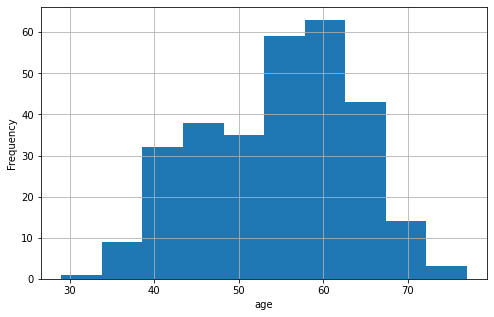

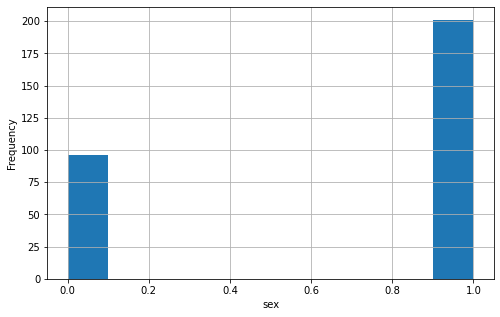

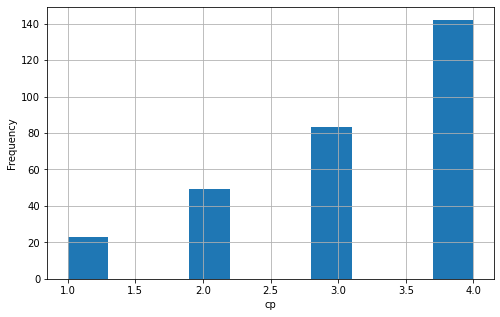

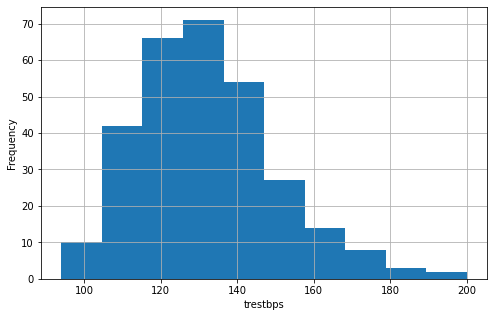

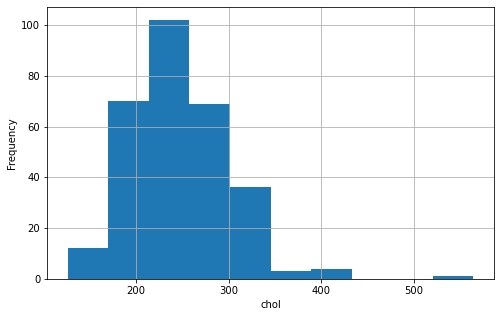

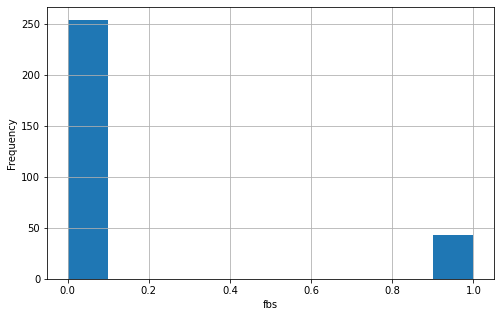

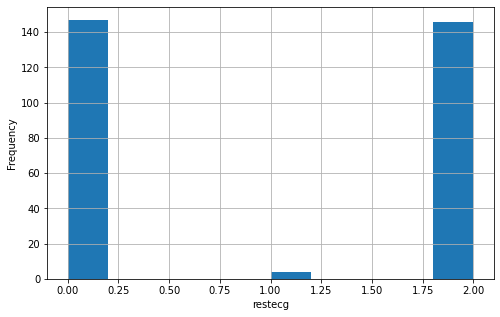

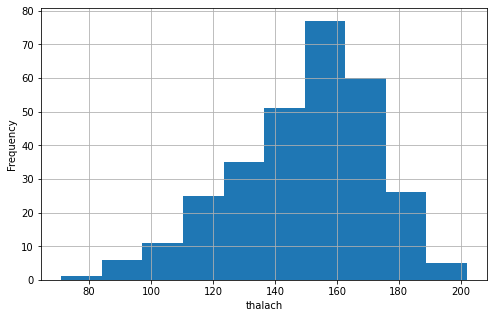

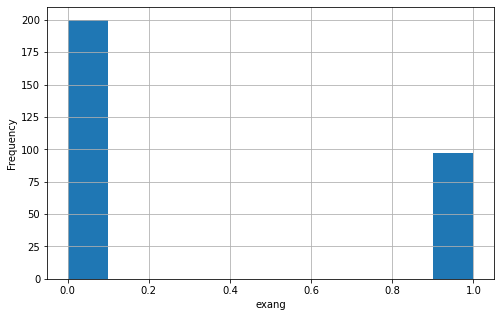

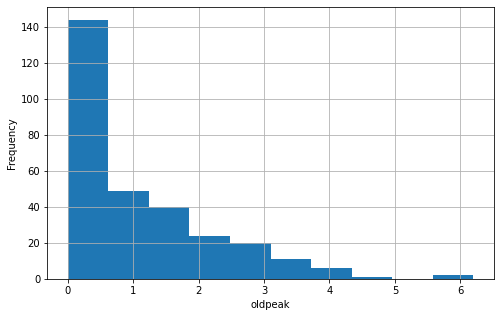

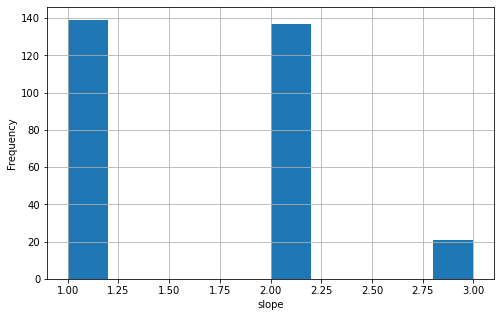

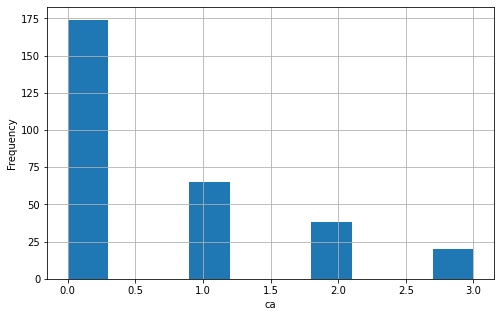

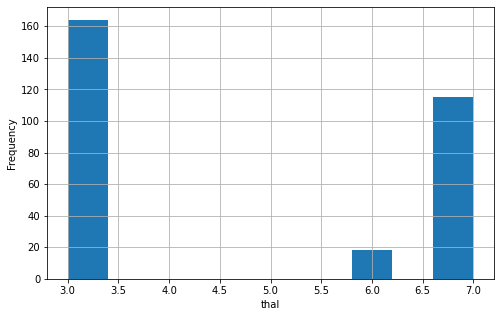

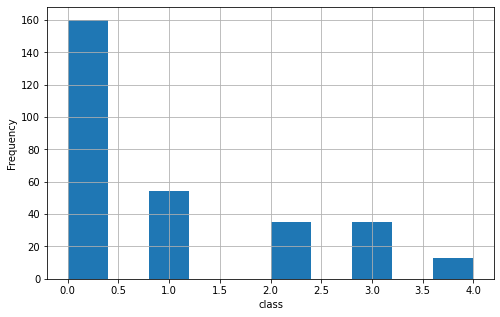

In [11]:
for i in range (0, len(HD.columns)):
    HD[HD.columns[i]].plot(kind = 'hist', grid = True, figsize = (8, 5))
    plt.xlabel(HD.columns[i])
    plt.ylabel('Frequency')
    plt.show()

### 3 Normalize the Dataset

Decision Trees can handle all handles without Normalization. Therefore no adjustments to the data has been applied.

### 4 Split the Dataset in Multiclass and Binary

Add new Column "Class Binary" which is derived from the "Class" > 0

In [12]:
HD["class binary"] = np.where(HD["class"] > 0, 1, 0)
HD.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


#### 4.1 Multiclass

For Multiclass we drop "Class Binary" and rename "Class" to "Class Multi"

In [13]:
HD_multi = HD.drop('class binary', axis=1)
HD_multi.rename(columns={'class': 'class multi'}, inplace=True)
HD_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class multi
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


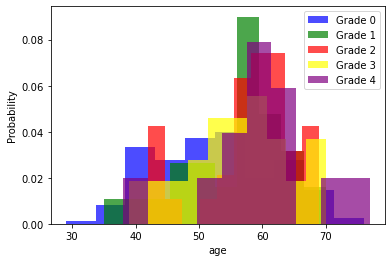

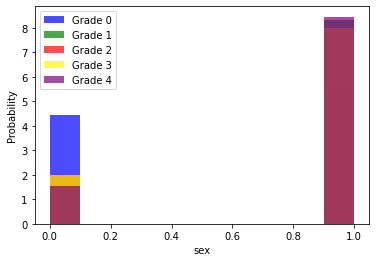

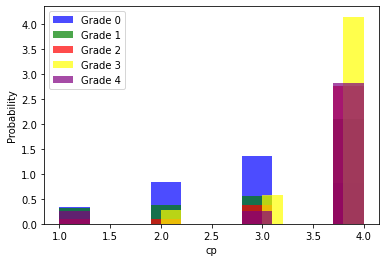

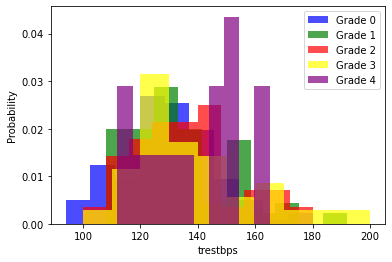

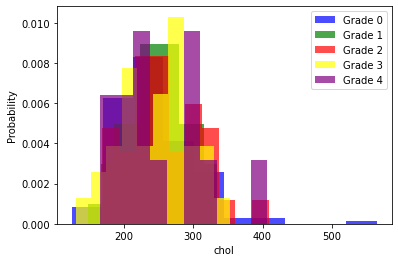

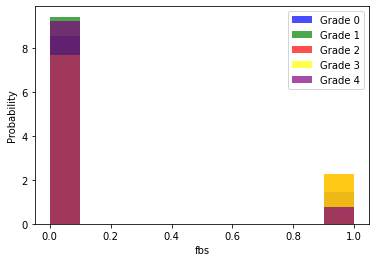

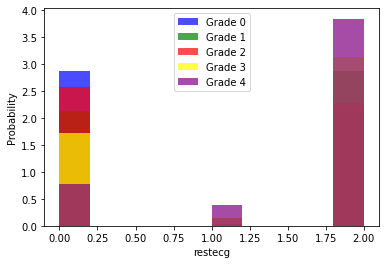

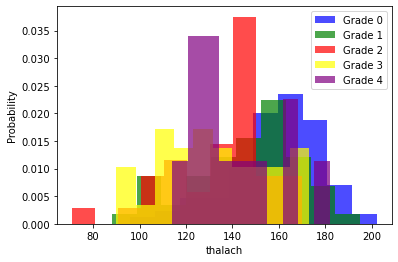

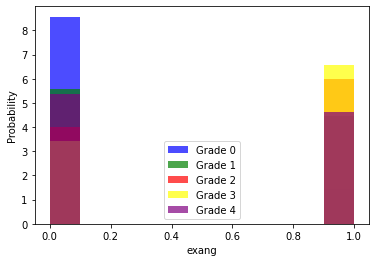

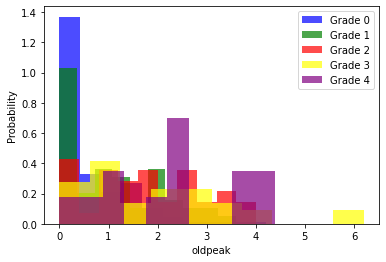

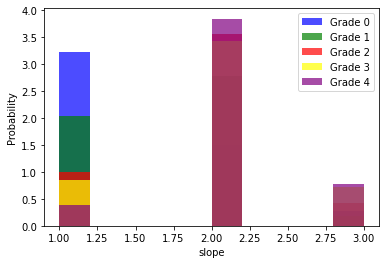

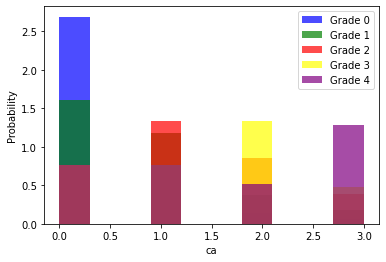

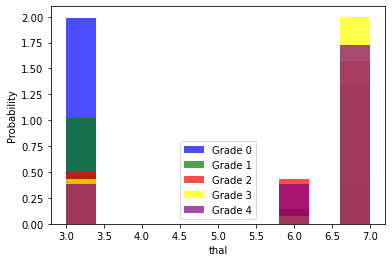

In [14]:
for i in cols[:]: 
    plt.hist(HD[HD["class"]==0][i], color='blue', label='Grade 0', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==1][i], color='green', label='Grade 1', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==2][i], color='red', label='Grade 2', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==3][i], color='yellow', label='Grade 3', alpha=0.7, density=True)
    plt.hist(HD[HD["class"]==4][i], color='purple', label='Grade 4', alpha=0.7, density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

#### 4.2 Binary

We drop "Class", because "Class Binary" is already available

In [15]:
HD_binary = HD.drop('class', axis=1)
HD_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,class binary
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


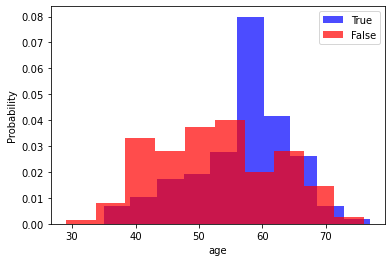

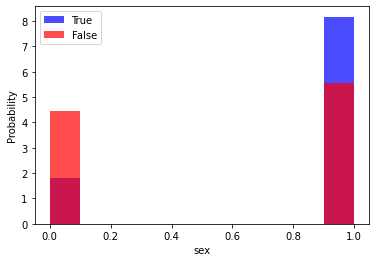

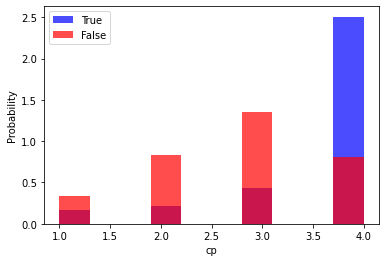

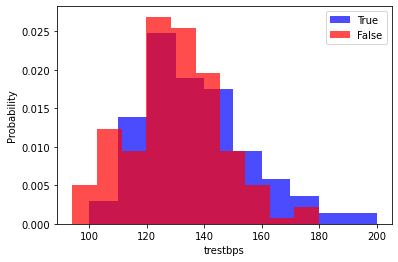

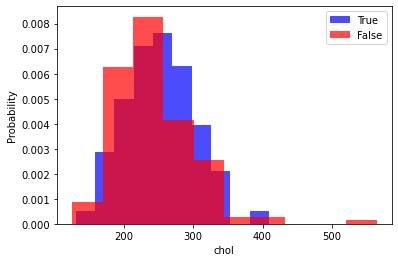

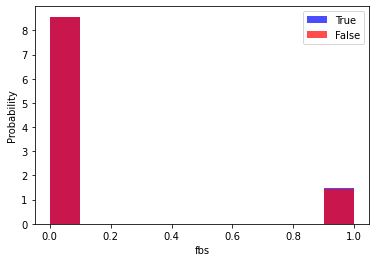

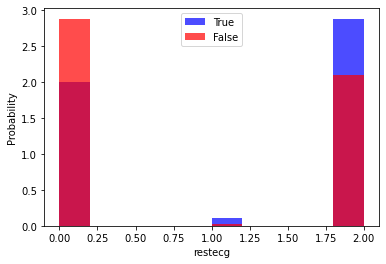

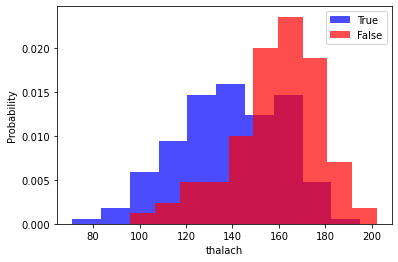

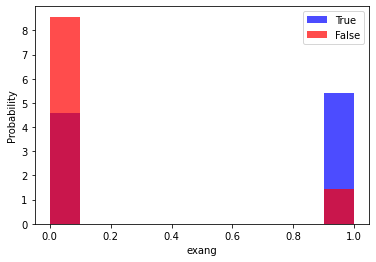

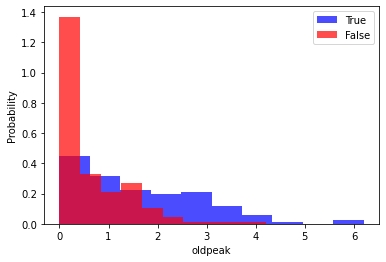

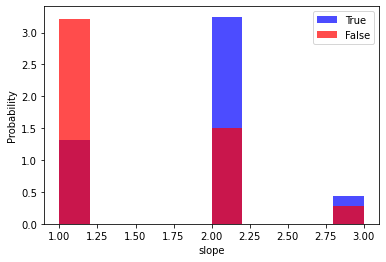

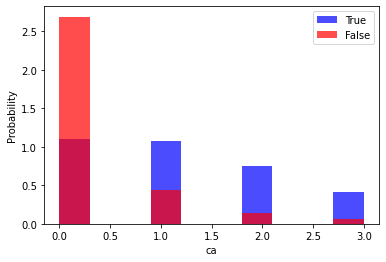

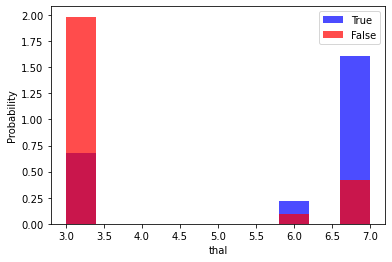

In [16]:
for i in cols[:]: 
    plt.hist(HD[HD["class binary"]==1][i], color='blue', label='True', alpha=0.7, density=True)
    plt.hist(HD[HD["class binary"]==0][i], color='red', label='False', alpha=0.7, density=True)
    plt.xlabel(i)
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

### 5 Define X & Y

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

#### 5.1 Multi

In [17]:
x_multi = HD_multi.drop('class multi', axis=1)       # features
y_multi = HD_multi['class multi']                    # labels

In [18]:
x_multi.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [19]:
y_multi.head()

0    0
1    2
2    1
3    0
4    0
Name: class multi, dtype: int64

#### 5.2 Binary

We define the x Table and y Table
- x Table contains all features (without the outcome)
- y Table only contains the Outcome

In [20]:
x_binary = HD_binary.drop('class binary', axis=1)       # features
y_binary = HD_binary['class binary']                    # labels

In [21]:
x_binary.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [22]:
y_binary.head()

0    0
1    1
2    1
3    0
4    0
Name: class binary, dtype: int32

### 6 Analysis of the different classes

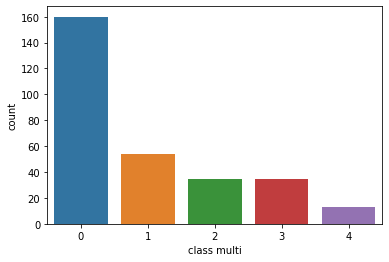

In [23]:
sns.countplot(y_multi);

In [24]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==0])/len(y_multi)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==1])/len(y_multi)*100), '%')
print('The percentage of 2 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==2])/len(y_multi)*100), '%')
print('The percentage of 3 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==3])/len(y_multi)*100), '%')
print('The percentage of 4 is:', '{:.2f}'.format(len(HD_multi[HD_multi['class multi']==4])/len(y_multi)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 18.18 %
The percentage of 2 is: 11.78 %
The percentage of 3 is: 11.78 %
The percentage of 4 is: 4.38 %


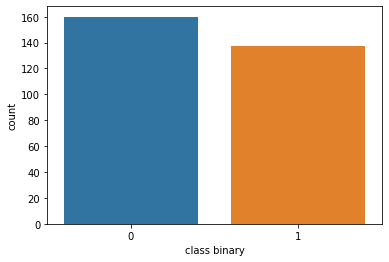

In [25]:
sns.countplot(y_binary);

In [26]:
print('The percentage of 0 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==0])/len(y_binary)*100), '%')
print('The percentage of 1 is:', '{:.2f}'.format(len(HD_binary[HD_binary['class binary']==1])/len(y_binary)*100), '%')

The percentage of 0 is: 53.87 %
The percentage of 1 is: 46.13 %


### 7 Split the Dataset into Train-Validation-Test

#### 7.1 Multi

In [27]:
from sklearn.model_selection import train_test_split

#split in Train (0.7) & in Test (0.3)
# random_state means the code will always have the same training set (in order to reproduce results)
x_multi_train, x_multi_test, y_multi_train, y_multi_test = train_test_split(x_multi, y_multi, test_size=0.3, random_state=42, stratify=y_multi)

#Split Train (0.7) into Train (0.5) & Validation (0.2)
# random_state means the code will always have the same training set (in order to reproduce results)
x_multi_train_val, x_multi_validation, y_multi_train_val, y_multi_validation = train_test_split(x_multi_train, y_multi_train, test_size=(0.2/0.7), random_state=42, stratify=y_multi_train)

In [28]:
#Quick check if the split is correct:
print("Shape of x_multi_train             : "+str(x_multi_train.shape))
print("Shape of x_multi_test              : "+str(x_multi_test.shape))
print("Shape of y_multi_train             : "+str(y_multi_train.shape))
print("Shape of y_multi_test              : "+str(y_multi_test.shape))
print('')
print("Lenght of Dataset                  : ", len(x_multi))
print("Percentage of Train_multi          : ", '{:.2f}'.format(len(x_multi_train)/len(x_multi)*100), '%')
print("Percentage of Test_multi           : ", '{:.2f}'.format(len(x_multi_test)/len(x_multi)*100), '%')

print("Percentage of x_multi_train_val    : ", '{:.2f}'.format(len(x_multi_train_val)/len(x_multi)*100), '%')
print("Percentage of Validation_multi     : ", '{:.2f}'.format(len(x_multi_validation)/len(x_multi)*100), '%')


Shape of x_multi_train             : (207, 13)
Shape of x_multi_test              : (90, 13)
Shape of y_multi_train             : (207,)
Shape of y_multi_test              : (90,)

Lenght of Dataset                  :  297
Percentage of Train_multi          :  69.70 %
Percentage of Test_multi           :  30.30 %
Percentage of x_multi_train_val    :  49.49 %
Percentage of Validation_multi     :  20.20 %


#### 7.2 Binary

In [29]:
from sklearn.model_selection import train_test_split

#Split in Train (0.7) & in Test (0.3)
#random_state means the code will always have the same training set (in order to reproduce results)
x_binary_train, x_binary_test, y_binary_train, y_binary_test = train_test_split(x_binary, y_binary, test_size=0.3, random_state=42, stratify=y_binary)

#Split Train (0.7) into Train (0.5) & Validation (0.2)
#random_state means the code will always have the same training set (in order to reproduce results)
x_binary_train_val, x_binary_validation, y_binary_train_val, y_binary_validation = train_test_split(x_binary_train, y_binary_train, test_size=(0.2/0.7), random_state=42,stratify=y_binary_train )

In [30]:
#Quick check if the split is correct:
print("Shape of x_binary_train             : "+str(x_binary_train.shape))
print("Shape of x_binary_test              : "+str(x_binary_test.shape))
print("Shape of y_binary_train             : "+str(y_binary_train.shape))
print("Shape of y_binary_test              : "+str(y_binary_test.shape))
print('')
print("Lenght of Dataset                   : ", len(x_binary))
print("Percentage of Train_binary          : ", '{:.2f}'.format(len(x_binary_train)/len(x_binary)*100), '%')
print("Percentage of Test_binary           : ", '{:.2f}'.format(len(x_binary_test)/len(x_binary)*100), '%')

print("Percentage of x_binary_train_val    : ", '{:.2f}'.format(len(x_binary_train_val)/len(x_binary)*100), '%')
print("Percentage of Validation_binary     : ", '{:.2f}'.format(len(x_binary_validation)/len(x_binary)*100), '%')


Shape of x_binary_train             : (207, 13)
Shape of x_binary_test              : (90, 13)
Shape of y_binary_train             : (207,)
Shape of y_binary_test              : (90,)

Lenght of Dataset                   :  297
Percentage of Train_binary          :  69.70 %
Percentage of Test_binary           :  30.30 %
Percentage of x_binary_train_val    :  49.49 %
Percentage of Validation_binary     :  20.20 %


### 8 Implementing the Models

Overview of the applied Models:

        8.1 Decision Tree Binary:
                
                8.1.1 Basic Decision Tree -> Train & Test + Max Depth = 3
                8.1.2 Decision Tree mit Cross Validation (KFold: Max Depth und Hyperparameter Tuning)
        8.2 Decision Tree Multiclass:
                
                8.2.1 Basic Decision Tree -> Train & Test + Max Depth = 3
                8.2.2 Decision Tree mit Cross Validation (KFold: Max Depth und Hyperparameter Tuning)
        8.3 Random Forest mit Binary:

                8.3.1 Basic Random Forest  -> Train & Test + Max Depth = 3
                8.3.2 Random Forest mit Cross Validation (KFold: Max Depth und Hyperparameter Tuning)
        8.4 Random Forest mit Multiclass:
        
                8.4.1 Basic Random Forest  -> Train & Test + Max Depth = 3
                8.4.2 Random Forest mit Cross Validation (KFold: Max Depth und Hyperparameter Tuning)

We use the following Model Abbreviations:
- dtb_basic
- dtb_cv
- dtm_basic
- dtm_cv
- rfb_basic
- rfb_cv
- rfm_basic
- rfm_cv

For each applied Model we will save the following Performance Metrics:
- Model
- Max Depth
- Accuracy in Sample
- Accuracy out of Sample
- Precision Score
- Recall Score
- F1 Score

In [206]:
Results = []

#### 8.1 Decision Tree Binary

##### 8.1.1 Decision Tree Binary (dtb_basic)

Create Basic Decision Tree for Binary, with Default Parameters and Max Depth = 3

In [32]:
from sklearn.tree import DecisionTreeClassifier

dtb_basic = DecisionTreeClassifier(max_depth=3, random_state=2)
dtb_basic.fit(x_binary_train, y_binary_train);

In [75]:
from sklearn.metrics import classification_report

y_predict = dtb_basic.predict(x_binary_test)
dtb_basic_report = classification_report(y_binary_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_binary_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.714     0.833     0.769        48
           1      0.765     0.619     0.684        42

    accuracy                          0.733        90
   macro avg      0.739     0.726     0.727        90
weighted avg      0.738     0.733     0.730        90



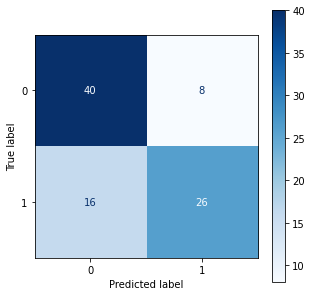

In [118]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
cm = confusion_matrix(y_binary_test, y_predict)

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtb_basic, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [214]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
model = 'dtb_basic'
max_depth = 3
accuracy_in_sample = dtb_basic.score(x_binary_train, y_binary_train)
accuracy_out_sample = dtb_basic.score(x_binary_test, y_binary_test)
Precision = dtb_basic_report['weighted avg']['precision'] 
Recall = dtb_basic_report['weighted avg']['recall']
F1 = dtb_basic_report['weighted avg']['f1-score']
cm = confusion_matrix(y_binary_test, y_predict)

#Append the Results from the Loop to the existing Dataframe:
dtb_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
dtb_basic_results = pd.DataFrame(dtb_basic_temp)
dtb_basic_results.rename(columns= {0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
dtb_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,dtb_basic,3,0.879227,0.733333,0.737815,0.733333,0.729555


In [ ]:
plt.figure(figsize = (16, 12))
plot_tree(dtc_tuned, filled = True, rounded = True, feature_names = feature_names, fontsize = 8, class_names = classnames)
plt.show()

##### 8.1.2 Decision Tree Binary with Cross Validation (dtb_cv)

In [122]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

df_classifier = DecisionTreeClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20],
             'min_samples_split': [2,3,4,5,6,7,8,9,10,15],
             'max_features': ['sqrt','log2']}

dtb_cv = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='accuracy')

dtb_cv.fit(x_binary_train, y_binary_train)
print('Best Model:')
print(dtb_cv.best_params_)
print('Best Score:')
print(dtb_cv.best_score_)

Fitting 15 folds for each of 440 candidates, totalling 6600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 15}
Best Score:
0.8052264808362372


[Parallel(n_jobs=1)]: Done 6600 out of 6600 | elapsed:   43.1s finished


In [123]:
dtb_cv_best = DecisionTreeClassifier(random_state=2, **dtb_cv.best_params_).fit(x_binary_train, y_binary_train)
y_pred = dtb_cv_best.predict(x_binary_test)
dtb_cv_report = classification_report(y_binary_test,y_pred, digits=3, output_dict=True)
print(classification_report(y_binary_test,y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.772     0.917     0.838        48
           1      0.879     0.690     0.773        42

    accuracy                          0.811        90
   macro avg      0.825     0.804     0.806        90
weighted avg      0.822     0.811     0.808        90



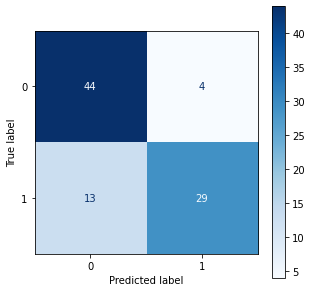

In [127]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtb_cv_best, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [215]:
model = 'dtb_cv'
max_depth = dtb_cv.best_params_['max_depth']
accuracy_in_sample = dtb_cv.best_score_ 
accuracy_out_sample = dtb_cv_best.score(x_binary_test, y_binary_test)
Precision = dtb_cv_report['weighted avg']['precision'] 
Recall = dtb_cv_report['weighted avg']['recall']
F1 = dtb_cv_report['weighted avg']['f1-score']

#Append the Results from the Loop to the existing Dataframe:
dtb_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
dtb_cv_results = pd.DataFrame(dtb_cv_temp)
dtb_cv_results.rename(columns= {0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
dtb_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,dtb_cv,5,0.805226,0.811111,0.821797,0.811111,0.807873


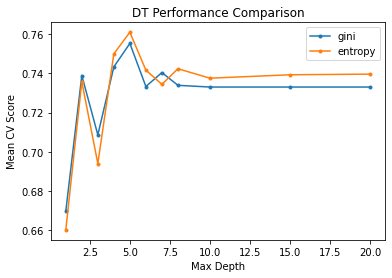

In [129]:
#ACHTUNG HIER WIRD EIN AVERAGE GERECHNET, WIR HABEN OBEN NEU AUCH NOCH SQRT UND LOG2? 
results_DT = pd.DataFrame(dtb_cv.cv_results_['params'])
results_DT['test_score'] = dtb_cv.cv_results_['mean_test_score']
results_DT.columns

for i in ['gini', 'entropy']:
    temp = results_DT[results_DT['criterion'] == i]
    temp_average = temp.groupby('max_depth').agg({'test_score': 'mean'})
    plt.plot(temp_average, marker = '.', label = i)
    
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel("Mean CV Score")
plt.title("DT Performance Comparison")
plt.show()

#### 8.2 Decision Tree Multiclass

##### 8.2.1 Decision Tree Basic (dtm_basic)

In [130]:
from sklearn.tree import DecisionTreeClassifier

dtm_basic = DecisionTreeClassifier(criterion = 'entropy',max_depth=3, random_state=2)
dtm_basic.fit(x_multi_train, y_multi_train);

In [131]:
from sklearn.metrics import classification_report, accuracy_score

y_predict = dtm_basic.predict(x_multi_test)
dtm_basic_report = classification_report(y_multi_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.701     0.979     0.817        48
           1      0.000     0.000     0.000        16
           2      0.100     0.182     0.129        11
           3      0.000     0.000     0.000        11
           4      0.000     0.000     0.000         4

    accuracy                          0.544        90
   macro avg      0.160     0.232     0.189        90
weighted avg      0.386     0.544     0.452        90



c:\Users\lione\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


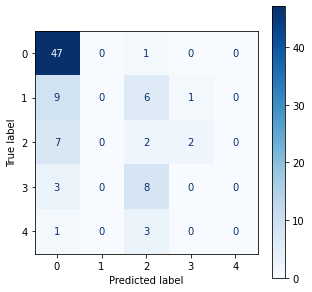

In [133]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtm_basic, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [216]:
model = 'dtm_basic'
max_depth = 3
accuracy_in_sample = dtm_basic.score(x_multi_train, y_multi_train)
accuracy_out_sample = dtm_basic.score(x_multi_test, y_multi_test)
Precision = dtm_basic_report['weighted avg']['precision'] 
Recall = dtm_basic_report['weighted avg']['recall']
F1 = dtm_basic_report['weighted avg']['f1-score']


#Append the Results from the Loop to the existing Dataframe:
dtm_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
dtm_basic_results = pd.DataFrame(dtm_basic_temp)
dtm_basic_results.rename(columns= {0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
dtm_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,dtm_basic,3,0.642512,0.544444,0.386352,0.544444,0.451713


##### 8.2.2 Decision Tree Multiclass Cross Validation (dtm_cv)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

df_classifier = DecisionTreeClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10, 15, 20],
             'min_samples_split': [2, 3,4,5,6,7,8,9,10,15],
             'max_features': ['sqrt','log2']}

dtm_cv = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='accuracy')

dtm_cv.fit(x_multi_train, y_multi_train)
print('Best Model:')
print(dtm_cv.best_params_)
print('Best Score:')
print(dtm_cv.best_score_)

Fitting 15 folds for each of 440 candidates, totalling 6600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 8}
Best Score:
0.5783972125435539


[Parallel(n_jobs=1)]: Done 6600 out of 6600 | elapsed:   42.5s finished


In [136]:
dtm_cv_best = DecisionTreeClassifier(random_state=2, **dtm_cv.best_params_).fit(x_multi_train, y_multi_train)
y_pred = dtm_cv.predict(x_multi_test)
dtm_cv_report = classification_report(y_multi_test, y_pred, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.719     0.958     0.821        48
           1      0.167     0.062     0.091        16
           2      0.111     0.091     0.100        11
           3      0.273     0.273     0.273        11
           4      0.000     0.000     0.000         4

    accuracy                          0.567        90
   macro avg      0.254     0.277     0.257        90
weighted avg      0.460     0.567     0.500        90



c:\Users\lione\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


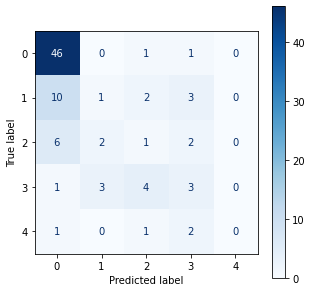

In [137]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(dtm_cv_best, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [217]:
#Hier müssen die Resultate von der Liste von oben einfügen:
model = 'dtm_cv'
max_depth = dtm_cv.best_params_['max_depth']
accuracy_in_sample = dtm_cv.best_score_ 
accuracy_out_sample = dtm_cv_best.score(x_multi_test, y_multi_test)
Precision = dtm_cv_report['weighted avg']['precision'] 
Recall = dtm_cv_report['weighted avg']['recall']
F1 = dtm_cv_report['weighted avg']['f1-score']

#Append the Results from the Loop to the existing Dataframe:
dtm_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
dtm_cv_results = pd.DataFrame(dtm_cv_temp)
dtm_cv_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
dtm_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,dtm_cv,4,0.578397,0.566667,0.459877,0.566667,0.499812


#### 8.3 Random Forest Binary (rfb)

##### 8.3.1 Random Forest Binary Basic (rfb_basic)

In [178]:
from sklearn.ensemble import RandomForestClassifier

rfb_basic = RandomForestClassifier(max_depth=3, random_state=2)
rfb_basic.fit(x_binary_train, y_binary_train)

RandomForestClassifier(max_depth=3, random_state=2)

In [179]:
from sklearn.metrics import classification_report, accuracy_score

y_predict = rfb_basic.predict(x_binary_test)
rfb_basic_report = classification_report(y_binary_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_binary_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.800     0.917     0.854        48
           1      0.886     0.738     0.805        42

    accuracy                          0.833        90
   macro avg      0.843     0.827     0.830        90
weighted avg      0.840     0.833     0.831        90



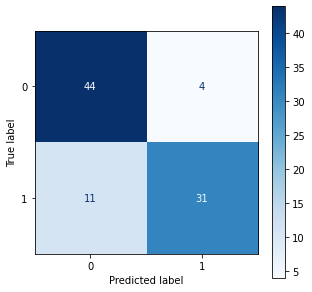

In [180]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfb_basic, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

Stimmt das überhaupt mit Test? müsste man nicht Predict machen?

In [218]:
model = 'rfb_basic'
max_depth = 3
accuracy_in_sample = rfb_basic.score(x_binary_train, y_binary_train)
accuracy_out_sample = rfb_basic.score(x_binary_test, y_binary_test)
Precision = rfb_basic_report['weighted avg']['precision'] 
Recall = rfb_basic_report['weighted avg']['recall']
F1 = rfb_basic_report['weighted avg']['f1-score']

#Append the Results from the Loop to the existing Dataframe:
rfb_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
rfb_basic_results = pd.DataFrame(rfb_basic_temp)
rfb_basic_results.rename(columns= {0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
rfb_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,rfb_basic,3,0.879227,0.833333,0.84,0.833333,0.831421


##### 8.3.2 Random Forest Binary mit CV (rfb_cv)

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

rfb_cv = RandomForestClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
             'min_samples_split': [2, 3,4,5,6,7,8,9,10],
             'max_features': ['sqrt','log2']}

rfb_cv = GridSearchCV(estimator=rfb_cv, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='accuracy')

rfb_cv.fit(x_binary_train, y_binary_train)
print('Best Model:')
print(rfb_cv.best_params_)
print('Best Score:')
print(rfb_cv.best_score_)

Fitting 15 folds for each of 440 candidates, totalling 6600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'criterion': 'entropy', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 8}
Best Score:
0.8421215640727837


[Parallel(n_jobs=1)]: Done 6600 out of 6600 | elapsed: 15.1min finished


In [183]:
y_predict = rfb_cv.predict(x_binary_test)
rfb_cv_report = classification_report(y_binary_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_binary_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.815     0.917     0.863        48
           1      0.889     0.762     0.821        42

    accuracy                          0.844        90
   macro avg      0.852     0.839     0.842        90
weighted avg      0.849     0.844     0.843        90



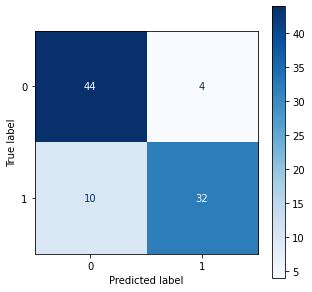

In [184]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(figsize=(5, 5))
plot_confusion_matrix(rfb_cv, x_binary_test, y_binary_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [219]:
model = 'rfb_cv'
max_depth = rfb_cv.best_params_['max_depth']
accuracy_in_sample = rfb_cv.best_score_ 
accuracy_out_sample = rfb_cv.score(x_binary_test, y_binary_test)
Precision = rfb_cv_report['weighted avg']['precision'] 
Recall = rfb_cv_report['weighted avg']['recall']
F1 = rfb_cv_report['weighted avg']['f1-score']

#Append the Results from the Loop to the existing Dataframe:
rfb_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
rfb_cv_results = pd.DataFrame(rfb_cv_temp)
rfb_cv_results.rename(columns= {0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
rfb_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,rfb_cv,4,0.842122,0.844444,0.849383,0.844444,0.843037


#### 8.4 Random Forest Multiclass (rfm)

##### 8.4.1 Random Forest Multi (rfm_basic)

In [186]:
# Import relevant packages
from sklearn.ensemble import RandomForestClassifier
rfm_basic = RandomForestClassifier(max_depth=3, random_state=2)
rfm_basic.fit(x_multi_train, y_multi_train)

RandomForestClassifier(max_depth=3, random_state=2)

In [187]:
from sklearn.metrics import classification_report, accuracy_score

y_predict = rfm_basic.predict(x_multi_test)
rfm_basic_report = classification_report(y_multi_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.671     0.979     0.797        48
           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        11
           3      0.333     0.364     0.348        11
           4      0.000     0.000     0.000         4

    accuracy                          0.567        90
   macro avg      0.201     0.269     0.229        90
weighted avg      0.399     0.567     0.467        90



c:\Users\lione\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


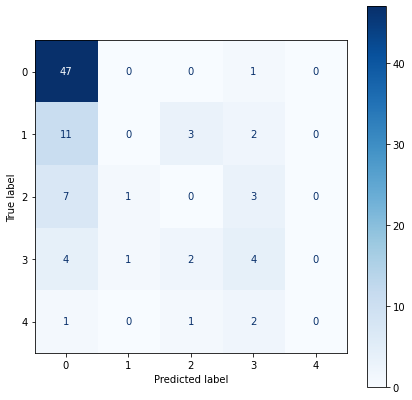

In [188]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rfm_basic, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [220]:
model = 'rfm_basic'
max_depth = 3
accuracy_in_sample = rfm_basic.score(x_multi_train, y_multi_train)
accuracy_out_sample = rfm_basic.score(x_multi_test, y_multi_test)
Precision = rfm_basic_report['weighted avg']['precision'] 
Recall = rfm_basic_report['weighted avg']['recall']
F1 = rfm_basic_report['weighted avg']['f1-score']

#Append the Results from the Loop to the existing Dataframe:
rfm_basic_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
rfm_basic_results= pd.DataFrame(rfm_basic_temp)
rfm_basic_results.rename(columns= {0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
rfm_basic_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,rfm_basic,3,0.705314,0.566667,0.398836,0.566667,0.467371


##### 8.4.2 Random Forest Multi mit CV (rfm_cv)

In [190]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer

rfm_cv = RandomForestClassifier(random_state=2)

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=2)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 10],
             'min_samples_split': [2, 3,4,5,6,7,8,9,10],
             'max_features': ['sqrt','log2']}

rfm_cv = GridSearchCV(estimator=rfm_cv, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, #output Messages
                     scoring='accuracy')

rfm_cv.fit(x_multi_train, y_multi_train)
print('Best Model:')
print(rfm_cv.best_params_)
print('Best Score:')
print(rfm_cv.best_score_)

Fitting 15 folds for each of 440 candidates, totalling 6600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Model:
{'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_split': 5}
Best Score:
0.6038327526132404


[Parallel(n_jobs=1)]: Done 6600 out of 6600 | elapsed: 14.9min finished


In [191]:
y_predict = rfm_cv.predict(x_multi_test)
rfm_cv_report = classification_report(y_multi_test, y_predict, output_dict=True, digits=3)
print(classification_report(y_multi_test, y_predict, digits=3))

              precision    recall  f1-score   support

           0      0.754     0.958     0.844        48
           1      0.000     0.000     0.000        16
           2      0.000     0.000     0.000        11
           3      0.100     0.091     0.095        11
           4      0.000     0.000     0.000         4

    accuracy                          0.522        90
   macro avg      0.171     0.210     0.188        90
weighted avg      0.414     0.522     0.462        90



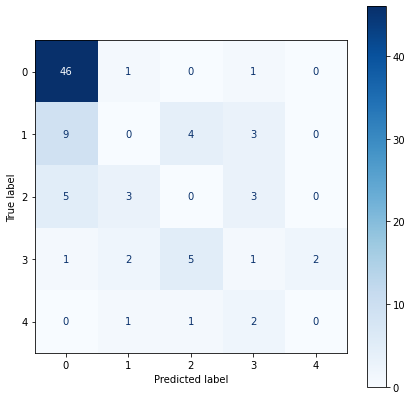

In [192]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_confusion_matrix(rfm_cv, x_multi_test, y_multi_test, display_labels= None, cmap=plt.cm.Blues, ax=ax)
plt.show()

In [221]:
model = 'rfm_cv'
max_depth = rfm_cv.best_params_['max_depth']
accuracy_in_sample = rfm_cv.best_score_
accuracy_out_sample = rfm_cv.score(x_multi_test, y_multi_test)
Precision = rfm_cv_report['weighted avg']['precision'] 
Recall = rfm_cv_report['weighted avg']['recall']
F1 = rfm_cv_report['weighted avg']['f1-score']

#Append the Results from the Loop to the existing Dataframe:
rfm_cv_temp = [(model, max_depth, accuracy_in_sample, accuracy_out_sample, Precision, Recall, F1)]
rfm_cv_results = pd.DataFrame(rfm_cv_temp)
rfm_cv_results.rename(columns={0:'Model', 1:'max_depth', 2:'accuracy_in_sample', 3:'accuracy_out_sample', 4:'Precision', 5:'Recall', 6:'F1'}, inplace = True)
rfm_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,rfm_cv,6,0.603833,0.522222,0.414408,0.522222,0.461793


### 9 All Results

In [222]:
Results = pd.DataFrame()

In [223]:
dtb_basic_results
dtm_cv_results
dtb_basic_results
dtm_cv_results
rfb_basic_results
rfb_cv_results
rfm_basic_results
rfm_cv_results

,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,rfm_cv,6,0.603833,0.522222,0.414408,0.522222,0.461793


In [236]:
Results_binary = pd.DataFrame()
Results_binary = Results_binary.append(dtb_basic_results)
Results_binary = Results_binary.append(dtb_cv_results)
Results_binary = Results_binary.append(rfb_basic_results)
Results_binary = Results_binary.append(rfb_cv_results)

Results_multi  = pd.DataFrame()
Results_multi = Results_multi.append(dtm_basic_results)
Results_multi = Results_multi.append(dtm_cv_results)
Results_multi = Results_multi.append(rfm_basic_results)
Results_multi = Results_multi.append(rfm_cv_results)
#Results.to_excel('Results.xlsx')
Results_binary.reset_index()

,index,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,0,dtb_basic,3,0.879227,0.733333,0.737815,0.733333,0.729555
1,0,dtb_cv,5,0.805226,0.811111,0.821797,0.811111,0.807873
2,0,rfb_basic,3,0.879227,0.833333,0.840000,0.833333,0.831421
3,0,rfb_cv,4,0.842122,0.844444,0.849383,0.844444,0.843037


In [237]:
Results_multi.reset_index()

,index,Model,max_depth,accuracy_in_sample,accuracy_out_sample,Precision,Recall,F1
0,0,dtm_basic,3,0.642512,0.544444,0.386352,0.544444,0.451713
1,0,dtm_cv,4,0.578397,0.566667,0.459877,0.566667,0.499812
2,0,rfm_basic,3,0.705314,0.566667,0.398836,0.566667,0.467371
3,0,rfm_cv,6,0.603833,0.522222,0.414408,0.522222,0.461793


### 10 Plots of best Model

In [68]:
predicted = rf.predict(x_multi_test)
predicted_results = pd.DataFrame(predicted)

predicted_results
accuracy_score(y_multi_train, predicted_results)

from sklearn.tree import plot_tree
plot_tree(dtb_basic, filled = True, rounded = True)

NameError: name 'rf' is not defined

In [ ]:
# Out-of-sample 
y_pred = de_reg_basic.predict(x_multi_test)

# confusion_matrix
from sklearn.metrics import confusion_matrix

# Out-of-Sample Confusion Matrix
cm_credit = confusion_matrix(y_test, y_pred)
cm_credit

def plot_decision_boundary(clf, X, Y, cmap='Paired_r'):
    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(5,5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k');

plot_decision_boundary(dtb_basic, X, y)

from sklearn.metrics import plot_confusion_matrix
disp = plot_confusion_matrix(dtb_basic, x_test, y_test,cmap=plt.cm.Blues)

In [ ]:
plt.figure(figsize = (16, 12))
plot_tree(dtb_basic, filled = True, rounded = True, feature_names = feature_names, fontsize = 8, class_names = classnames)
plt.show()